In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

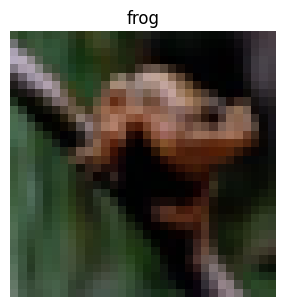

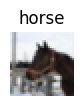

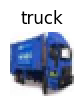

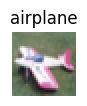

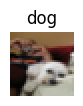

In [2]:
(trainImages, trainLabels), (testImages, testLabels) = tf.keras.datasets.cifar10.load_data()
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
validationImages, validationLabels = trainImages[:5000], trainLabels[:5000]
trainImages, trainLabels = trainImages[5000:], trainLabels[5000:]
trainDS = tf.data.Dataset.from_tensor_slices((trainImages, trainLabels))
testDS = tf.data.Dataset.from_tensor_slices((testImages, testLabels))
validationDS = tf.data.Dataset.from_tensor_slices((validationImages, validationLabels))
plt.figure(figsize=(20, 20))
for i, (image, label) in enumerate(trainDS.take(5)):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')
    plt.show()

In [3]:
def processImage(image, label):
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image, (100, 100))
    return image, label
trainDSSize = tf.data.experimental.cardinality(trainDS).numpy()
testDSSize = tf.data.experimental.cardinality(testDS).numpy()
validationDSSize = tf.data.experimental.cardinality(validationDS).numpy()
print(trainDSSize, testDSSize, validationDSSize)
trainDS = (trainDS
           .map(processImage)
           .shuffle(buffer_size=trainDSSize)
           .batch(batch_size=32, drop_remainder=True))
testDS = (testDS
          .map(processImage)
          .shuffle(buffer_size=testDSSize)
          .batch(batch_size=32, drop_remainder=True))
validationDS = (validationDS.map(processImage)).shuffle(buffer_size=validationDSSize).batch(batch_size=32, drop_remainder=True)


45000 10000 5000


In [4]:
model = tf.keras.models.Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(100,100,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [5]:
model.compile( loss = 'sparse_categorical_crossentropy', optimizer = tf.optimizers.SGD(lr=0.001), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 256)      1024      
 hNormalization)                                                 
                                                        

In [6]:
model.fit(trainDS, epochs = 5, validation_data = validationDS, validation_freq = 1)

Epoch 1/5
1406/1406 [==============================] - 933s 661ms/step - loss: 1.6156 - accuracy: 0.4316 - val_loss: 1.2409 - val_accuracy: 0.5595
Epoch 2/5
1406/1406 [==============================] - 786s 557ms/step - loss: 1.1374 - accuracy: 0.5969 - val_loss: 0.9344 - val_accuracy: 0.6755
Epoch 3/5
1406/1406 [==============================] - 798s 566ms/step - loss: 0.9189 - accuracy: 0.6790 - val_loss: 0.8891 - val_accuracy: 0.6911
Epoch 4/5
1406/1406 [==============================] - 914s 647ms/step - loss: 0.7707 - accuracy: 0.7317 - val_loss: 0.7702 - val_accuracy: 0.7326
Epoch 5/5
1406/1406 [==============================] - 846s 599ms/step - loss: 0.6632 - accuracy: 0.7688 - val_loss: 0.6963 - val_accuracy: 0.7578


In [7]:
model.evaluate(testDS)

312/312 [==============================] - 35s 110ms/step - loss: 0.7431 - accuracy: 0.7408


[0.7430656552314758, 0.7407852411270142]